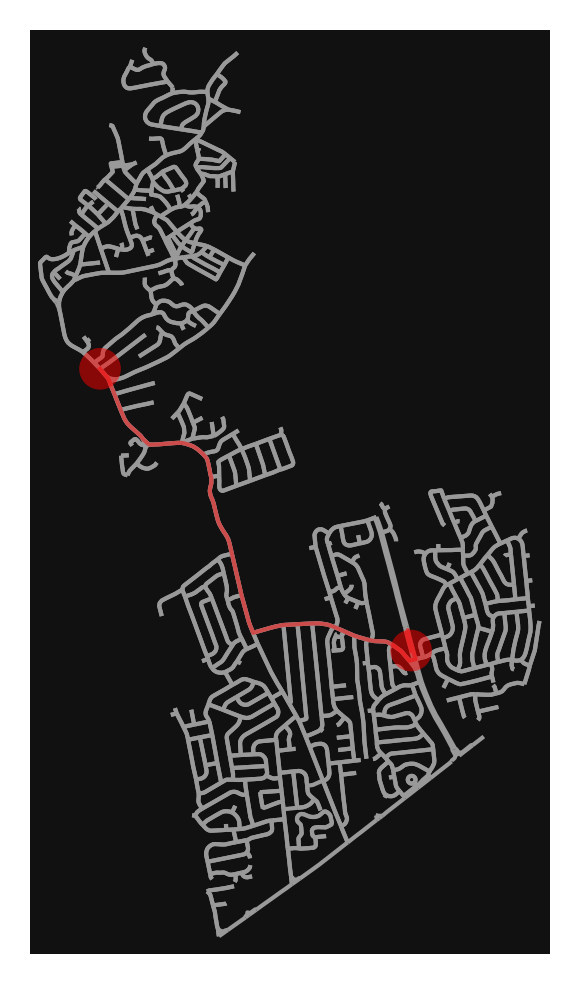

(<Figure size 1500x1200 with 1 Axes>, <Axes: >)

In [12]:
import networkx as nx
import osmnx as ox

import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 300

G = ox.graph_from_place("Stony Brook, New York, USA", network_type="drive")

G_undirected = ox.convert.to_undirected(G)

orig_node = list(G.nodes())[10]
dest_node = list(G.nodes())[-1]
path = nx.astar_path(G, orig_node, dest_node, weight="length")

ox.plot_graph_route(G, path, route_linewidth=1, node_size=0, figsize=(5, 4))

In [13]:
import pandas as pd

df = pd.read_parquet("./polygon.parquet")
df

,OGR_FID,Name,geom
0,1,LOT 1,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x08\x00...
1,2,LOT 2,"b""\x01\x03\x00\x00\x00\x01\x00\x00\x00\x0f\x00..."
2,3,LOT 3,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x11\x00...
3,4,LOT 3,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
4,5,LOT 4,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
...,...,...,...
60,61,LIRR,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x08\x00...
61,62,Health Sciences Garage,"b""\x01\x03\x00\x00\x00\x01\x00\x00\x00\x0f\x00..."
62,63,Administration Parking Garage,"b""\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00..."
63,64,Hospital Parking Garage,"b""\x01\x03\x00\x00\x00\x01\x00\x00\x00\x0f\x00..."


0    b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x08\x00...
1    b"\x01\x03\x00\x00\x00\x01\x00\x00\x00\x0f\x00...
2    b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x11\x00...
3    b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
4    b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
Name: geom, dtype: object
                                                geom  \
0  b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x08\x00...   
1  b"\x01\x03\x00\x00\x00\x01\x00\x00\x00\x0f\x00...   
2  b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x11\x00...   
3  b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...   
4  b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...   

                                            geometry  
0  POLYGON ((-73.117584615713 40.915878049399, -7...  
1  POLYGON ((-73.1188617871383 40.9177110415651, ...  
2  POLYGON ((-73.1212273659484 40.920938599297, -...  
3  POLYGON ((-73.1178469840606 40.9201468013128, ...  
4  POLYGON ((-73.1225963583575 40.9176974120349, ...  


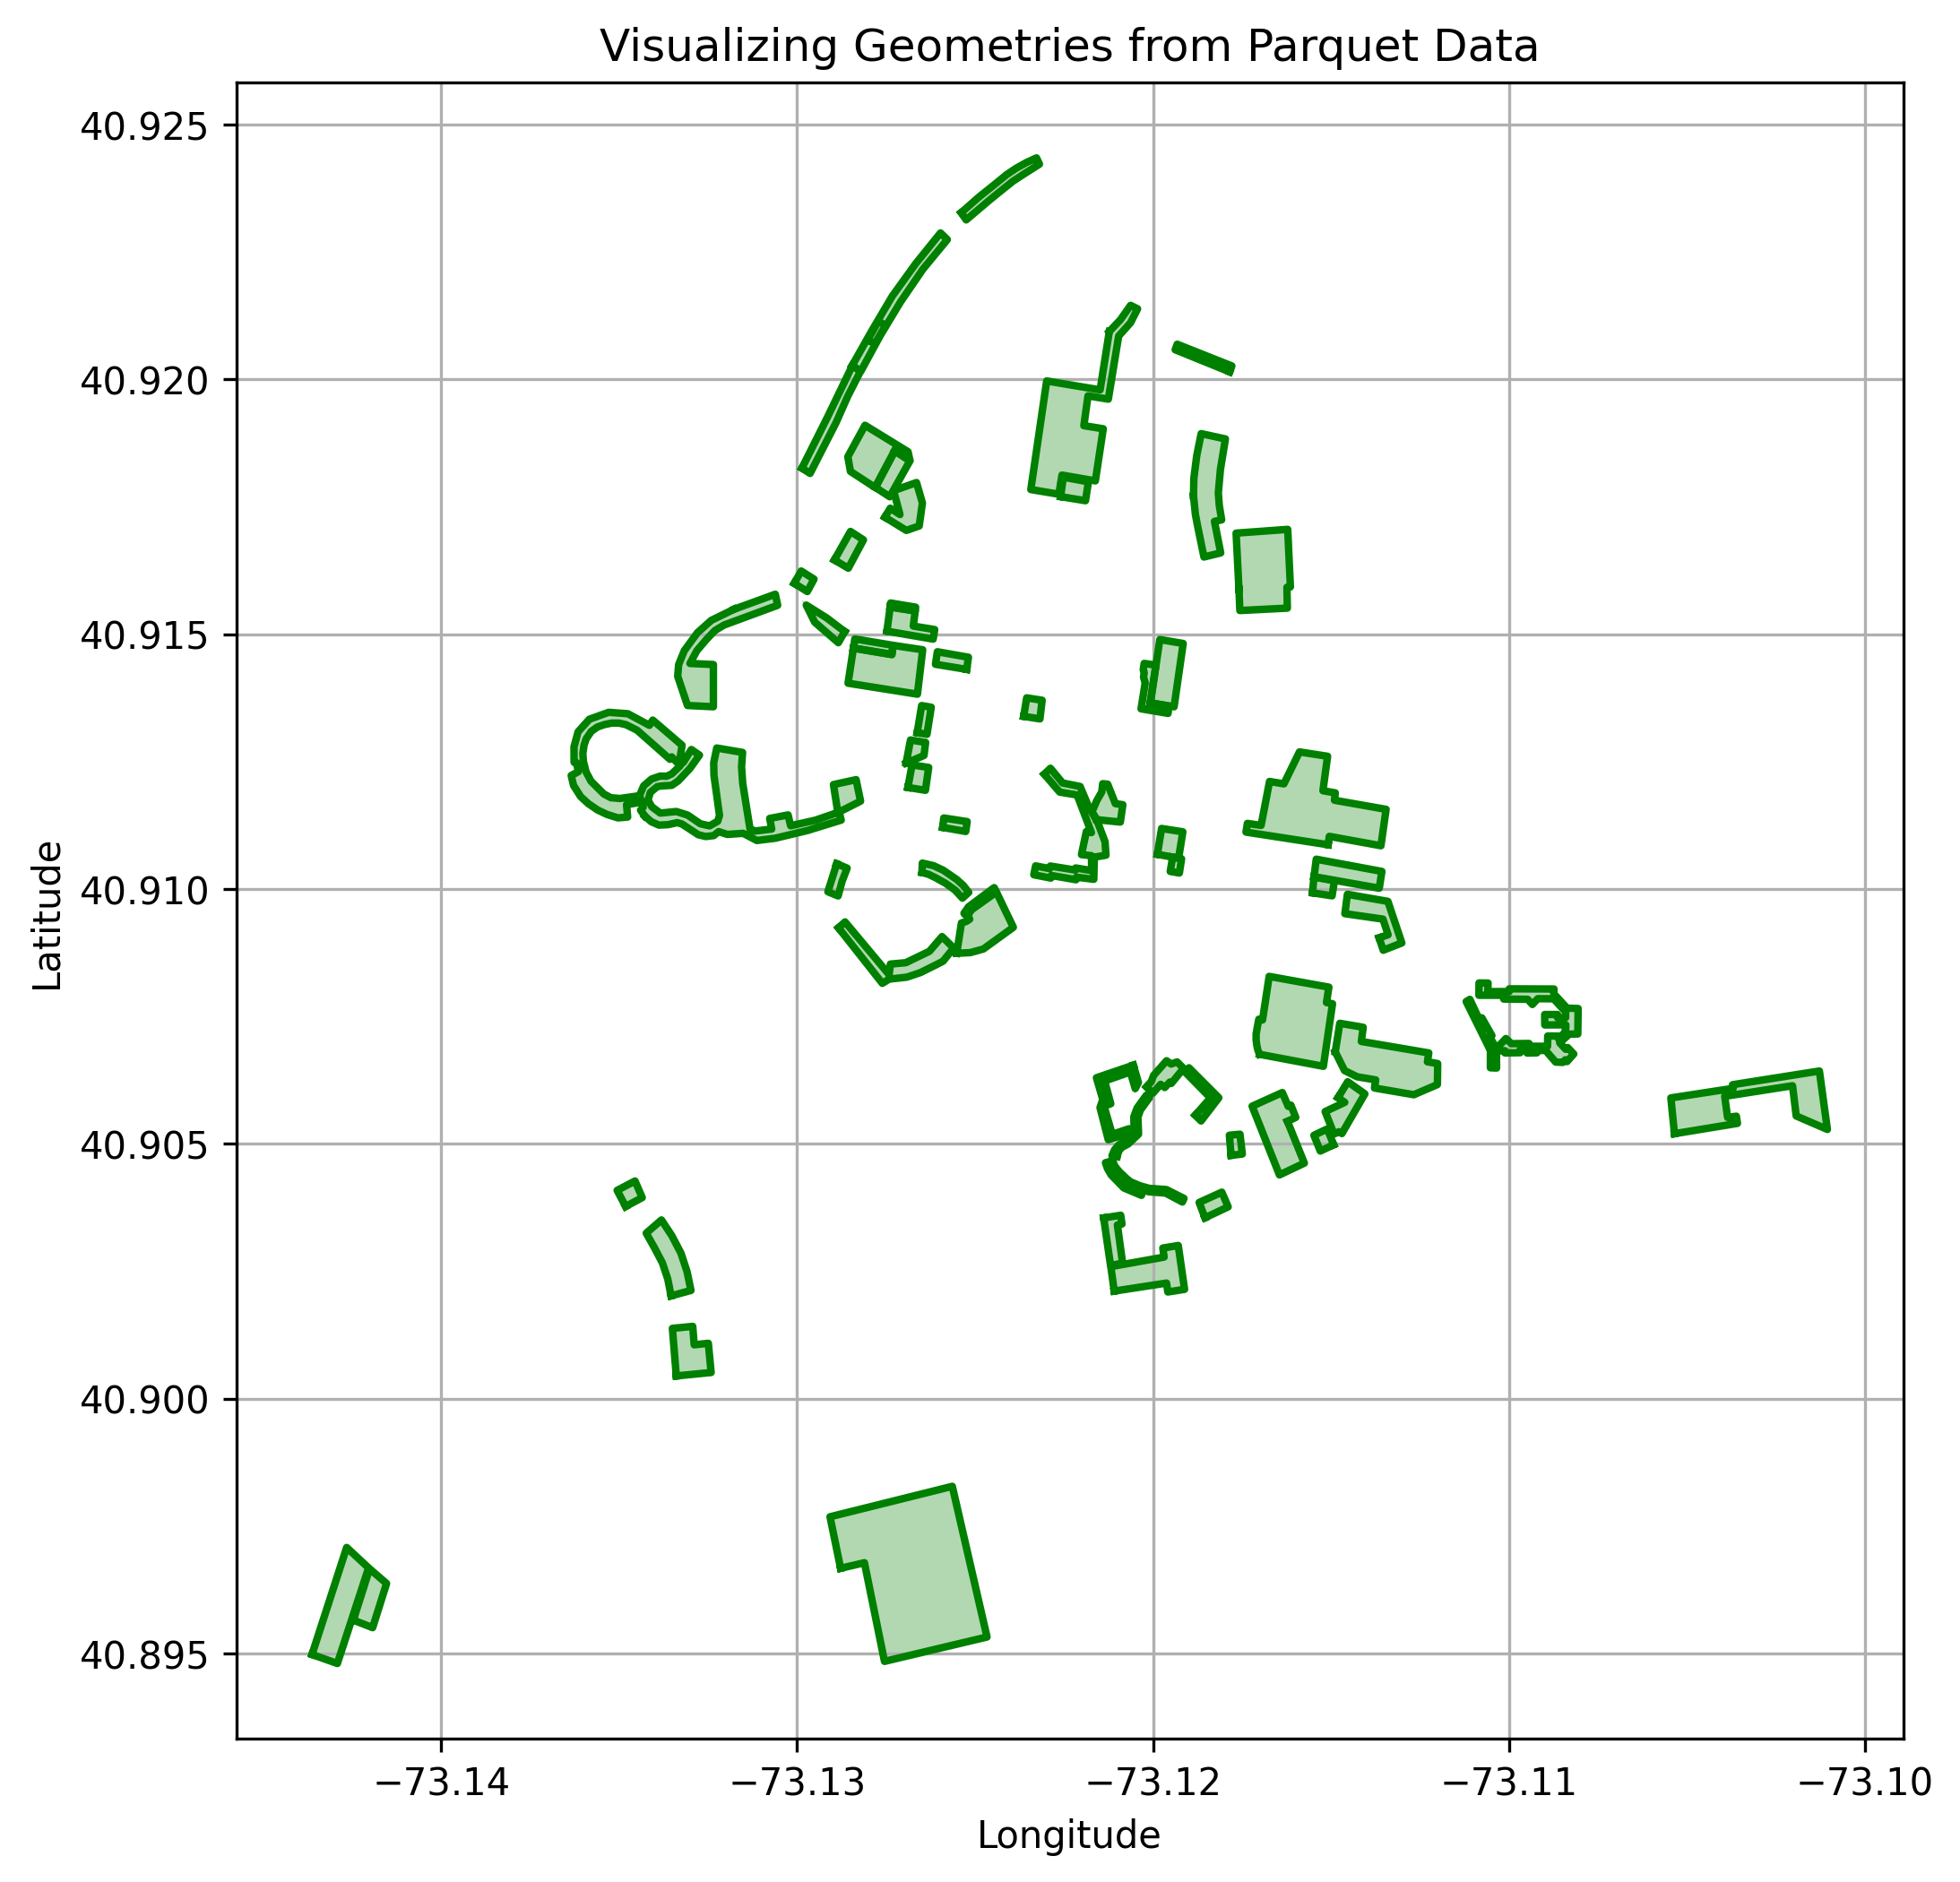

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from shapely.wkb import loads
from shapely.geometry import Point, LineString, Polygon

df = pd.read_parquet('./polygon.parquet')
print(df['geom'].head())


def convert_wkb(wkb_data):
    try:
        if isinstance(wkb_data, bytes):
            return loads(wkb_data)
        elif isinstance(wkb_data, str):
            return loads(ast.literal_eval(wkb_data))
        else:
            return None
    except Exception as e:
        print(f"Error converting WKB: {e}")
        return None


df['geometry'] = df['geom'].apply(convert_wkb)
print(df[['geom', 'geometry']].head())

fig, ax = plt.subplots(figsize=(8, 8))


def plot_geometry(geom, ax):
    if isinstance(geom, Point):
        ax.plot(geom.x, geom.y, 'ro', markersize=5)
    elif isinstance(geom, LineString):
        x, y = geom.xy
        ax.plot(x, y, 'b-', linewidth=2)
    elif isinstance(geom, Polygon):
        x, y = geom.exterior.xy
        ax.plot(x, y, 'g-', linewidth=2)
        ax.fill(x, y, color='green', alpha=0.3)


for geom in df['geometry']:
    if geom:
        plot_geometry(geom, ax)

ax.set_title("Visualizing Geometries from Parquet Data")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.grid(True)
plt.show()

In [15]:
G_undirected.nodes[214094156]

{'y': 40.901328,
 'x': -73.10661,
 'highway': 'turning_circle',
 'street_count': 1}

In [16]:
[(G_undirected.nodes[node]["x"], G_undirected.nodes[node]["y"]) for node in path]

[(-73.1434163, 40.9131339),
 (-73.142785, 40.9125685),
 (-73.142455, 40.9121678),
 (-73.141944, 40.9111756),
 (-73.141309, 40.909957),
 (-73.1390141, 40.9076947),
 (-73.138293, 40.9072633),
 (-73.1350719, 40.9074045),
 (-73.1328081, 40.9064912),
 (-73.1320405, 40.9047662),
 (-73.129916, 40.898826),
 (-73.1296152, 40.8978546),
 (-73.128933, 40.895618),
 (-73.1277456, 40.8927046),
 (-73.124638, 40.893309),
 (-73.123196, 40.893371),
 (-73.121694, 40.893424),
 (-73.11954, 40.893187),
 (-73.119343, 40.893126),
 (-73.118508, 40.8928503),
 (-73.1184279, 40.8928227),
 (-73.1174026, 40.8924853),
 (-73.1160677, 40.8921822),
 (-73.115621, 40.8921064),
 (-73.1135767, 40.8918152),
 (-73.1117431, 40.8905412),
 (-73.111323, 40.8906201),
 (-73.1111212, 40.8906648),
 (-73.1119062, 40.8929241),
 (-73.1120509, 40.8926883),
 (-73.1115651, 40.8913312)]

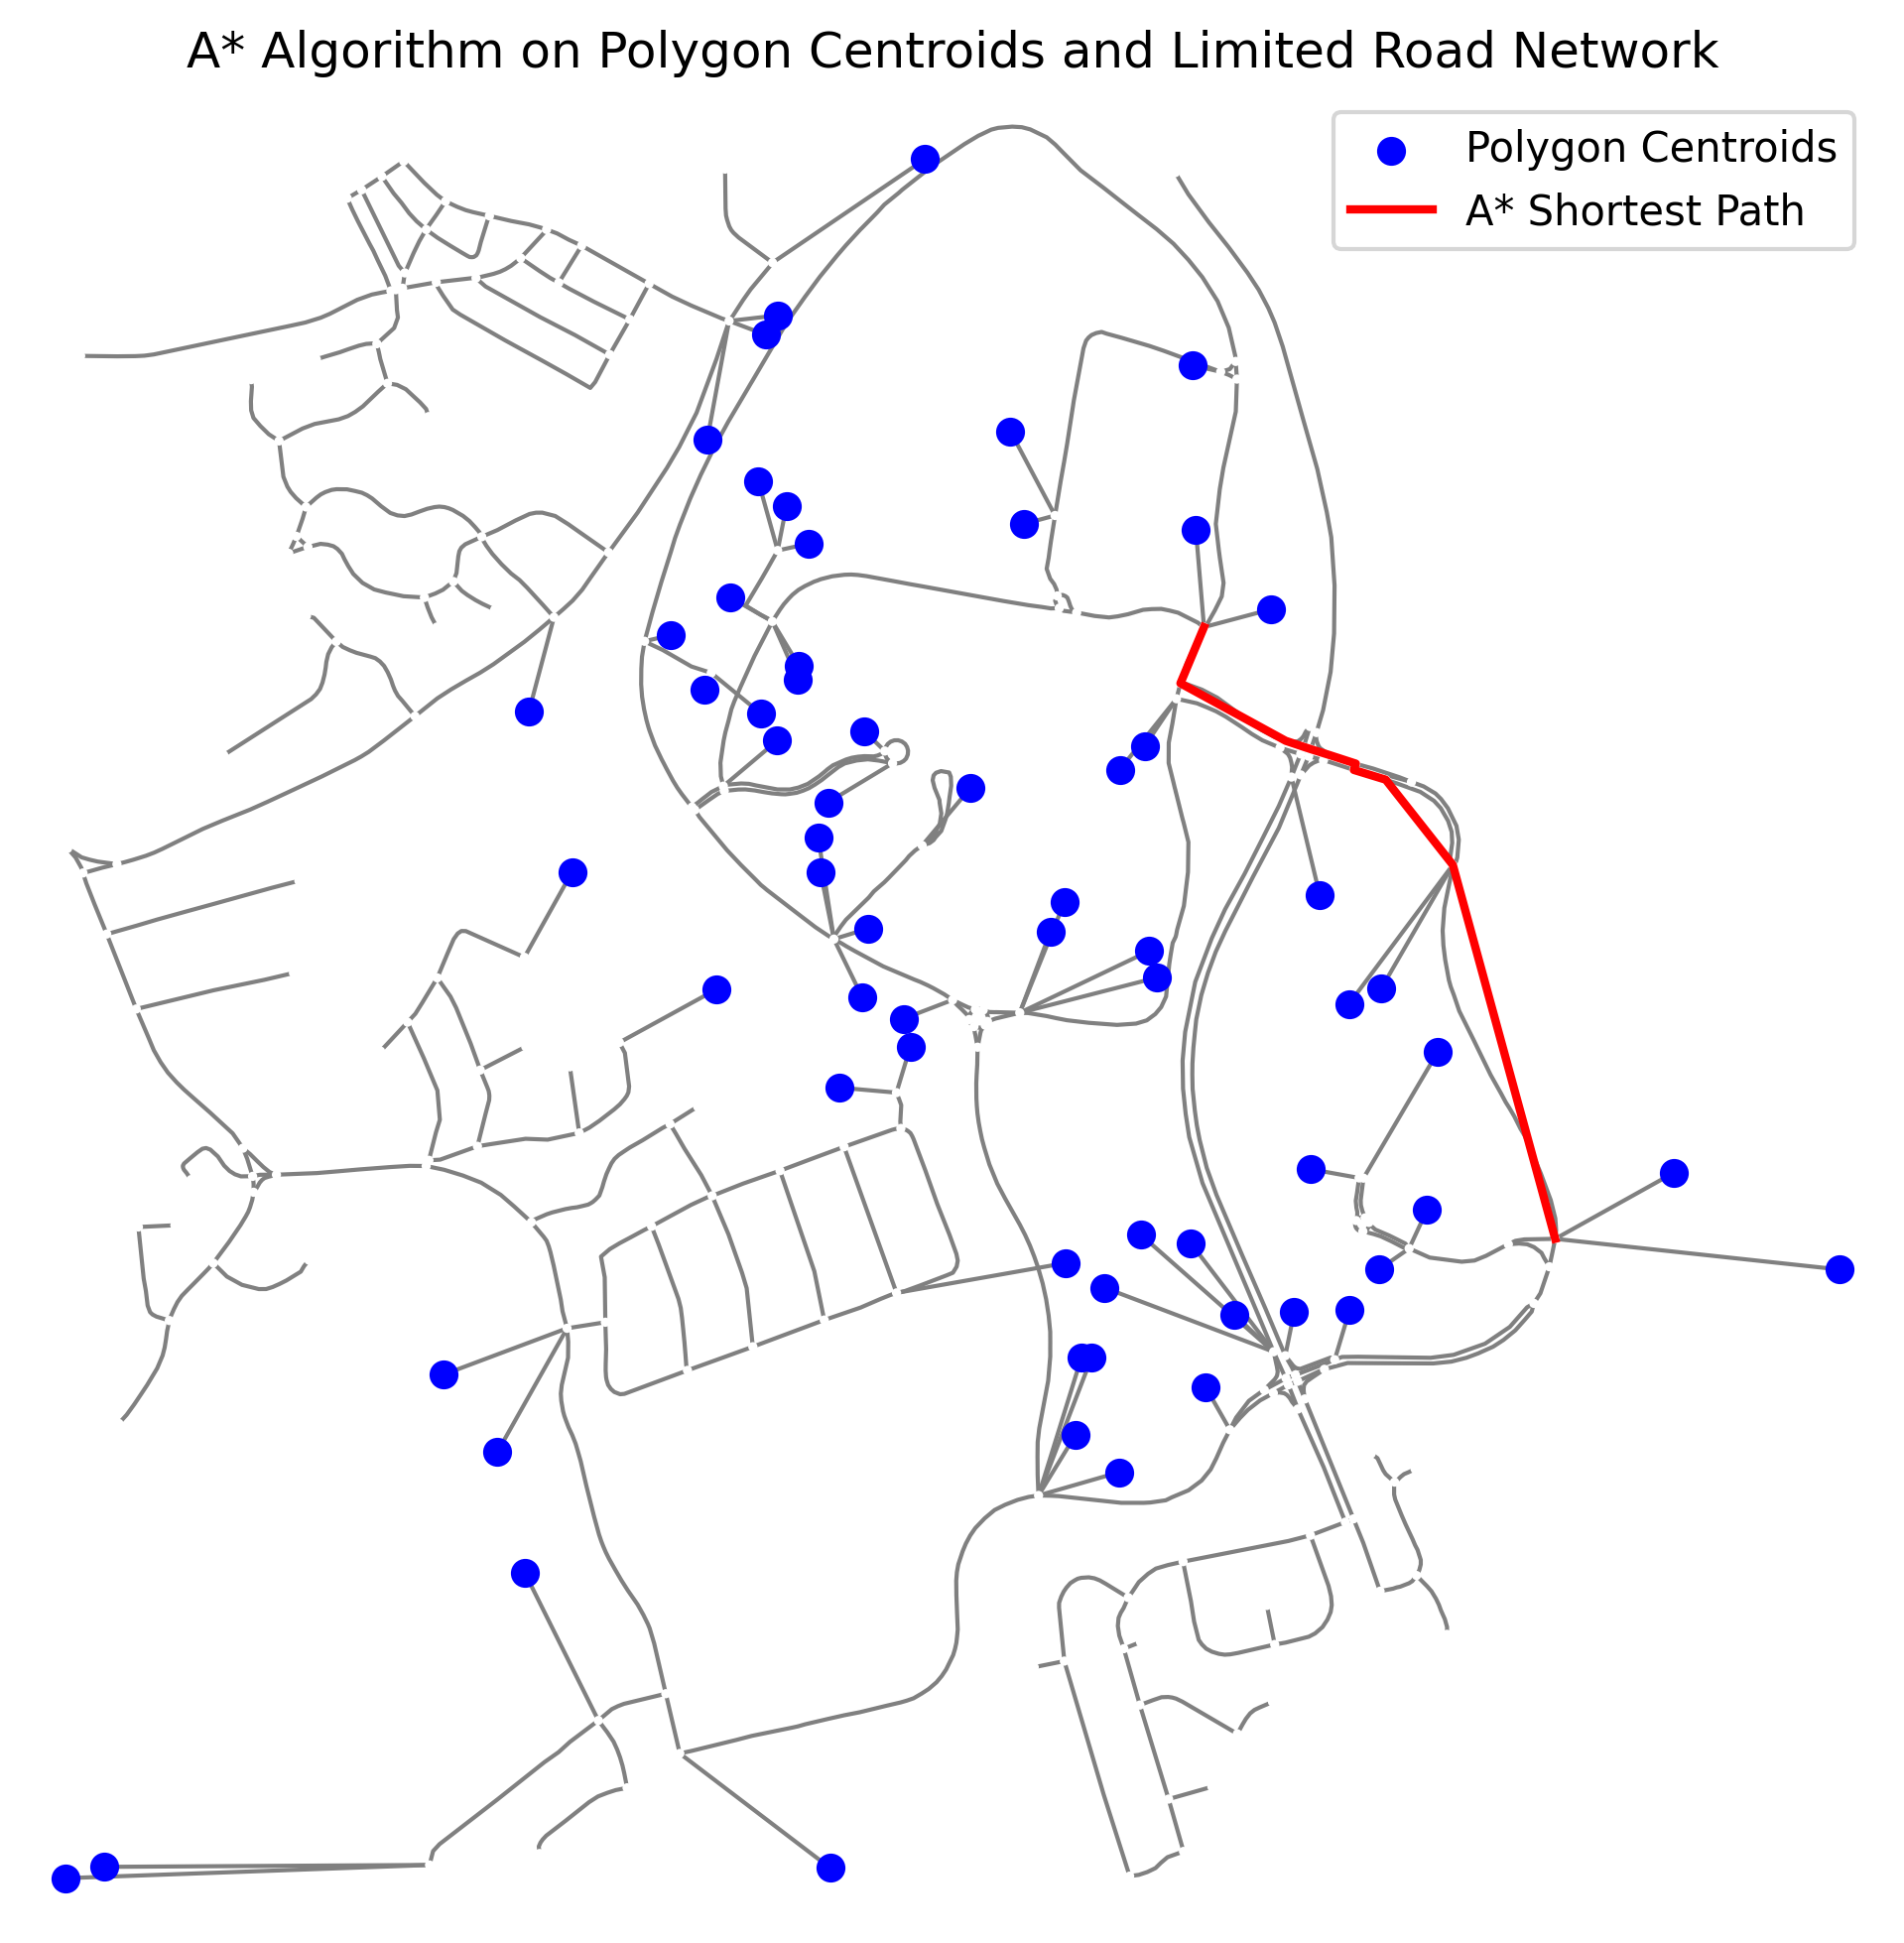

shortest path: [np.int64(359583164), 213900660, 6069213503, 213486673, 2822007770, 214138343, 7830311830, 7830311831, 7830311834, 7808469747, 686538151]


In [17]:
import pandas as pd
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
from shapely.geometry import Point

polygon_file_path = "./polygon.csv"
df_polygon = pd.read_csv(polygon_file_path)
min_x, max_x = df_polygon["X"].min(), df_polygon["X"].max()
min_y, max_y = df_polygon["Y"].min(), df_polygon["Y"].max()
bbox = (min_x, min_y, max_x, max_y)
G = ox.graph_from_bbox(bbox, network_type="drive")
G_undirected = ox.convert.to_undirected(G)


def get_nearest_road_node(row):
    return ox.distance.nearest_nodes(G_undirected, row["X"], row["Y"])


df_polygon["nearest_road_node"] = df_polygon.apply(get_nearest_road_node, axis=1)
for idx, row in df_polygon.iterrows():
    centroid_coords = (row["X"], row["Y"])
    G_undirected.add_node(idx, x=row["X"], y=row["Y"])
    G_undirected.add_edge(idx, row["nearest_road_node"], weight=0.001)

start_node = df_polygon.iloc[0]["nearest_road_node"]
end_node = df_polygon.iloc[-1]["nearest_road_node"]
path = nx.astar_path(G_undirected, start_node, end_node, weight="length")
path_coords = [(G_undirected.nodes[node]["x"], G_undirected.nodes[node]["y"]) for node in path]

fig, ax = plt.subplots(figsize=(8, 8))
ox.plot_graph(G_undirected, ax=ax, node_size=5, edge_color="gray", show=False, close=False)
ax.scatter(df_polygon["X"], df_polygon["Y"], color="blue", label="Polygon Centroids")
path_x, path_y = zip(*path_coords)
ax.plot(path_x, path_y, "r-", linewidth=2, label="A* Shortest Path")

ax.set_title("A* Algorithm on Polygon Centroids and Limited Road Network")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend()
plt.grid(True)
plt.show()

print("shortest path:", path)

In [18]:
df_polygon

,X,Y,Z,Name,Unnamed: 4,nearest_road_node
0,-73.116901,40.916454,0,LOT 1,NaN,359583164
1,-73.118511,40.917740,0,LOT 2,NaN,359583164
2,-73.122504,40.919350,0,LOT 3,NaN,5327685835
3,-73.118587,40.920422,0,LOT 3,NaN,5994642278
4,-73.122207,40.917843,0,LOT 4,NaN,5327685835
...,...,...,...,...,...,...
60,-73.129025,40.919209,0,LIRR,NaN,213527267
61,-73.115849,40.911813,0,Health Sciences Garage,NaN,2822007765
62,-73.119610,40.914234,0,Administration Parking Garage,NaN,213682625
63,-73.116045,40.907353,0,Hospital Parking Garage,NaN,686546849


/var/folders/f7/v7t29scd6_d0mvv47zzdb6800000gn/T/ipykernel_15087/2079421779.py:73: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


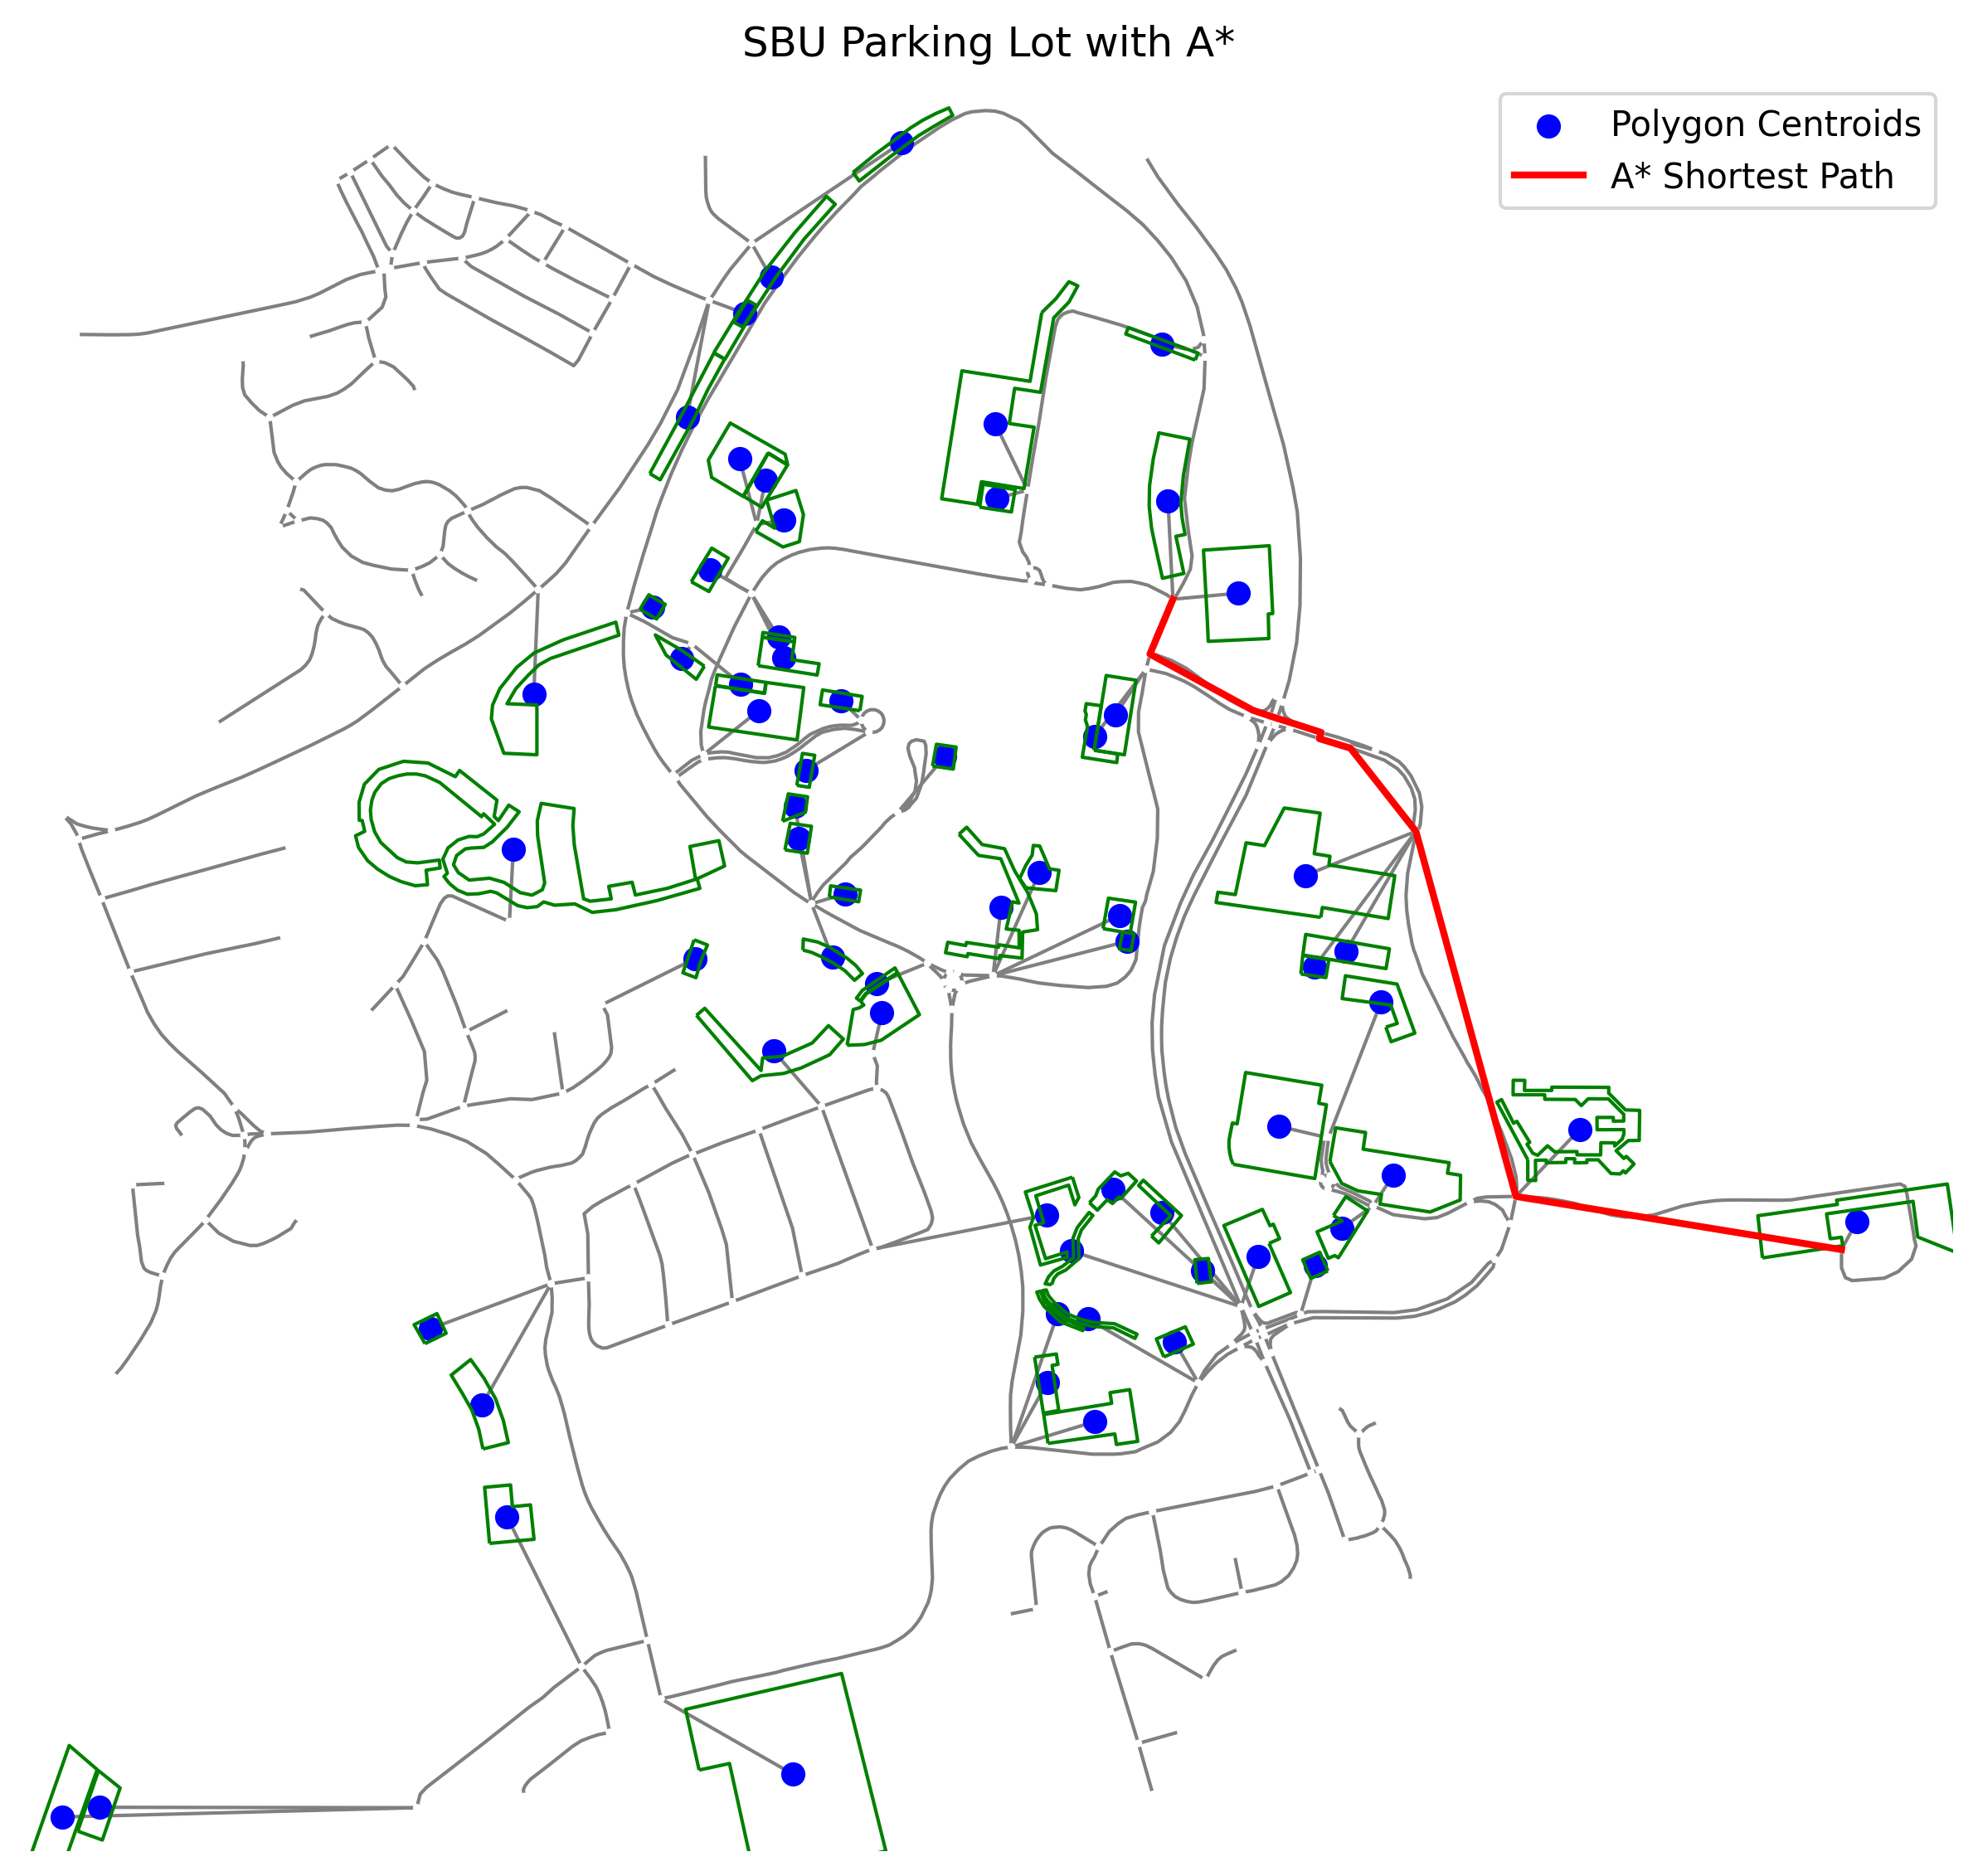

[np.int64(359583164), 213900660, 6069213503, 213486673, 2822007770, 214138343, 7830311830, 7830311831, 7830311834, 7808469747, 686538151, 7813543614]


In [19]:
import pandas as pd
import osmnx as ox
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.wkb import loads
from shapely.geometry import Point, Polygon
import ast

df_polygon = pd.read_parquet("./polygon.parquet")


def convert_wkb(wkb_data):
    try:
        if isinstance(wkb_data, bytes):
            return loads(wkb_data)
        elif isinstance(wkb_data, str):
            return loads(ast.literal_eval(wkb_data))
        else:
            return None
    except Exception as e:
        print(f"Error converting WKB: {e}")
        return None


df_polygon["geometry"] = df_polygon["geom"].apply(convert_wkb)
gdf_polygon = gpd.GeoDataFrame(df_polygon, geometry=df_polygon["geometry"], crs="EPSG:4326")
gdf_polygon["centroid"] = gdf_polygon["geometry"].apply(
    lambda geom: geom.centroid if isinstance(geom, Polygon) else None)
gdf_polygon["X"] = gdf_polygon["centroid"].apply(lambda c: c.x if c else None)
gdf_polygon["Y"] = gdf_polygon["centroid"].apply(lambda c: c.y if c else None)
gdf_polygon = gdf_polygon.dropna(subset=["X", "Y"])

min_x, max_x = gdf_polygon["X"].min(), gdf_polygon["X"].max()
min_y, max_y = gdf_polygon["Y"].min(), gdf_polygon["Y"].max()
bbox = (min_x, min_y, max_x, max_y)
G = ox.graph_from_bbox(bbox, network_type="drive")
G_undirected = ox.convert.to_undirected(G)


def get_nearest_road_node(row):
    return ox.distance.nearest_nodes(G_undirected, row["X"], row["Y"])


gdf_polygon["nearest_road_node"] = gdf_polygon.apply(get_nearest_road_node, axis=1)

for idx, row in gdf_polygon.iterrows():
    G_undirected.add_node(idx, x=row["X"], y=row["Y"])
    G_undirected.add_edge(idx, row["nearest_road_node"], weight=0.001)

# Below is A* Algo. Part
start_node = gdf_polygon.iloc[0]["nearest_road_node"]
end_node = gdf_polygon.iloc[-1]["nearest_road_node"]
path = nx.astar_path(G_undirected, start_node, end_node, weight="length")
path_coords = [(G_undirected.nodes[node]["x"], G_undirected.nodes[node]["y"]) for node in path]

# plotting part
fig, ax = plt.subplots(figsize=(10, 10))
ox.plot_graph(G_undirected, ax=ax, node_size=5, edge_color="gray", show=False, close=False)
ax.scatter(gdf_polygon["X"], gdf_polygon["Y"], color="blue", label="Polygon Centroids")
path_x, path_y = zip(*path_coords)
ax.plot(path_x, path_y, "r-", linewidth=2, label="A* Shortest Path")
gdf_polygon.plot(ax=ax, facecolor="none", edgecolor="green", linewidth=1, label="Polygons")

ax.set_title("SBU Parking Lot with A*")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend()
plt.grid(True)
plt.show()

print(path)
